# Projeto Spotify: Entendendo as características que afetam o número de *streams* de músicas no aplicativo *Spotify*.

### O interesse maior deste projeto é identificar como é o perfil das músicas mais populares no *Spotify*. O banco de dados utilizado para as análises contém informações sobre o teor de dançabilidade, de emocional, de energia, de acústica, de instrumentalidade, de vivacidade e de vocal das canções. Possui informações também de batidas por minuto e presença em playlists e charts não só do *Spotify*, mas também de outros aplicativos de música.

Importando bibliotecas.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from scipy.stats import mannwhitneyu

pd.set_option('display.max_columns', None)

Carregando o banco de dados e verificando sua estrutura.

Disponível em: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data

In [2]:
df = pd.read_csv("spotify-2023.csv", encoding="latin-1")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


Renomeando as colunas, verificando os tipos das variáveis e se há presença de dados faltantes.

In [3]:
mapa_nomes = {'track_name': 'nome_da_faixa',
              'artist(s)_name': 'nome_do(s)_artista(s)',
              'artist_count': 'n_de_artistas',
              'released_year': 'ano_de_lançamento',
              'released_month': 'mês_de_lançamento',
              'released_day': 'dia_de_lançamento',
              'in_spotify_playlists': 'n_playlists_do_spotify',
              'in_spotify_charts': 'n_charts_do_spotify',
              'in_apple_playlists': 'n_playlists_da_apple',
              'in_apple_charts': 'n_charts_da_apple',
              'in_deezer_playlists': 'n_playlists_do_deezer',
              'in_deezer_charts': 'n_charts_do_deezer',
              'in_shazam_charts': 'n_charts_do_shazam',
              'bpm': 'batidas_minuto',
              'key': 'chave',
              'mode': 'modo',
              'danceability_%': 'dançabilidade_%',
              'valence_%': 'emocional_%',
              'energy_%': 'energia_%',
              'acousticness_%': 'acústica_%',
              'instrumentalness_%': 'instrumentalidade_%',
              'liveness_%': 'vivacidade_%',
              'speechiness_%': 'vocal_%'}
df.rename(columns=mapa_nomes, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   nome_da_faixa           953 non-null    object
 1   nome_do(s)_artista(s)   953 non-null    object
 2   n_de_artistas           953 non-null    int64 
 3   ano_de_lançamento       953 non-null    int64 
 4   mês_de_lançamento       953 non-null    int64 
 5   dia_de_lançamento       953 non-null    int64 
 6   n_playlists_do_spotify  953 non-null    int64 
 7   n_charts_do_spotify     953 non-null    int64 
 8   streams                 953 non-null    object
 9   n_playlists_da_apple    953 non-null    int64 
 10  n_charts_da_apple       953 non-null    int64 
 11  n_playlists_do_deezer   953 non-null    object
 12  n_charts_do_deezer      953 non-null    int64 
 13  n_charts_do_shazam      903 non-null    object
 14  batidas_minuto          953 non-null    int64 
 15  chave 

Transformando as variáveis para os tipos corretos:

---



In [4]:
categorical_columns = ['nome_da_faixa', 'nome_do(s)_artista(s)', 'ano_de_lançamento', 'mês_de_lançamento', 'dia_de_lançamento', 'chave', 'modo']


for col in df.columns:
    if col not in categorical_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

for col in df.columns:
  if col in categorical_columns:
    df[col] = pd.Categorical(df[col])


Verificando se ocorreu tudo certo com a atualização:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   nome_da_faixa           953 non-null    category
 1   nome_do(s)_artista(s)   953 non-null    category
 2   n_de_artistas           953 non-null    int64   
 3   ano_de_lançamento       953 non-null    category
 4   mês_de_lançamento       953 non-null    category
 5   dia_de_lançamento       953 non-null    category
 6   n_playlists_do_spotify  953 non-null    int64   
 7   n_charts_do_spotify     953 non-null    int64   
 8   streams                 952 non-null    float64 
 9   n_playlists_da_apple    953 non-null    int64   
 10  n_charts_da_apple       953 non-null    int64   
 11  n_playlists_do_deezer   874 non-null    float64 
 12  n_charts_do_deezer      953 non-null    int64   
 13  n_charts_do_shazam      896 non-null    float64 
 14  batidas_minuto          95

Como há valores faltantes, esses serão retirados da análise.

In [6]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   nome_da_faixa           748 non-null    category
 1   nome_do(s)_artista(s)   748 non-null    category
 2   n_de_artistas           748 non-null    int64   
 3   ano_de_lançamento       748 non-null    category
 4   mês_de_lançamento       748 non-null    category
 5   dia_de_lançamento       748 non-null    category
 6   n_playlists_do_spotify  748 non-null    int64   
 7   n_charts_do_spotify     748 non-null    int64   
 8   streams                 748 non-null    float64 
 9   n_playlists_da_apple    748 non-null    int64   
 10  n_charts_da_apple       748 non-null    int64   
 11  n_playlists_do_deezer   748 non-null    float64 
 12  n_charts_do_deezer      748 non-null    int64   
 13  n_charts_do_shazam      748 non-null    float64 
 14  batidas_minuto          74

## Análise descritiva

O gráfico abaixo apresenta uma linha para cada música no banco de dados. No eixo X estão dispostas as características das músicas, em porcentagem, enquanto no eixo Y estão os níveis das mesmas. As cores são importantes para haver a percepção da constituição das músicas mais ouvidas, sendo que cores quentes representam as canções mais populares, e as cores frias representam o inverso.

Um resultado forte já possível de se concluir observando a figura é que o nível de instrumental em uma música diminui consideravelmente o seu alcance, sendo os maiores *streams* exemplos de que essa característica é quase inexistente. Em relação às outras medidas, não se tem um padrão tão visível como para o nível de instrumental. Mais a frente será possível enxergar melhor as relações uma a uma.



In [7]:
fig_parallel = px.parallel_coordinates(df, dimensions=['dançabilidade_%', 'emocional_%', 'energia_%',
                                                      'acústica_%', 'instrumentalidade_%', 'vivacidade_%', 'vocal_%'],
                                       color='streams',
                                       title='Características das músicas mais ouvidas')
fig_parallel.show()

O gráfico abaixo permite visualizar a mesma informação do anterior, porém com a limitação de que só é possível fazê-lo com 3 variáveis ao mesmo tempo. Neste exemplo, estão sendo comparados os níveis de energia, do emocional e da dançabilidade. Observe que no interior do cubo há esferas de tamanhos que se diferenciam de acordo com o número de *streams*, sendo que esferas maiores representam músicas mais ouvidas em relação às outras. As cores estão presentes com os mesmos significados do gráfico anterior.

Como existem 7 variáveis, no total existem $C^7_3 = 35$ gráficos possíveis de serem feitos. Então fica a cargo do profissional de dados ou de negócios de escolher as 3 de mais interesse para visualizar em conjunto, ou mesmo visualizar um gráfico com as 7 dimensões ao mesmo tempo, assim como o gráfico anterior já faz.


In [8]:
fig_3d_scatter = px.scatter_3d(df, x='energia_%', y='emocional_%', z='dançabilidade_%', color='streams',
                               size='streams', hover_name='nome_da_faixa',
                               title='Energia vs. Emocional vs. Dançabilidade')
fig_3d_scatter.show()

Verificando as primeiras 50 músicas mais ouvidas no conjunto de dados:

- A dançabilidade e a energia se mostram importantes para promover uma música a ponto de estar no Top 50 músicas mais ouvidas no Spotify;
- Ao mesmo tempo, como discutido anteriormente, a instrumentalidade se mostra como o inverso das outras duas;
- A vivacidade e o vocal de uma música, assim como a instrumentalidade, não interferem tão positivamente nos números de *streams*;
- O emocional e a acústica se mostram muito variantes nessa definição. Com um desvio padrão de 23.57 e 25.70, respectivamente, essas características variam muito em músicas com muitos *streams* ou não.


Já verificando as últimas 50 músicas da lista de mais ouvidas, os comentários a seguir surgem:

- Dos comentários feitos sobre as Top 50, não há uma mudança significativa com relação às medidas das músicas;

- Essa comparação foi útil para enxergar que não necessariamente quando as músicas mais populares apresentam baixo instrumentalismo, por exemplo, as músicas menos populares apresentarão esse mesmo índice mais elevado;

- A variável *bpm* (batidas por minuto) não apresenta uma diferença discrepante também quando se compara os dois casos, diferente das colunas referentes às presenças das composições nos aplicativos *Apple Music*, *Deezer*, *Shazam* e até mesmo o *Spotify*, que são aonde as maiores diferenças são encontradas.

In [9]:
top_50 = df.nlargest(50, 'streams')
top_50.describe()

,n_de_artistas,n_playlists_do_spotify,n_charts_do_spotify,streams,n_playlists_da_apple,n_charts_da_apple,n_playlists_do_deezer,n_charts_do_deezer,n_charts_do_shazam,batidas_minuto,dançabilidade_%,emocional_%,energia_%,acústica_%,instrumentalidade_%,vivacidade_%,vocal_%
count,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.460000,10071.740000,21.120000,1.378426e+09,143.700000,74.840000,421.420000,5.920000,67.060000,123.900000,65.300000,44.300000,62.020000,27.840000,1.280000,19.140000,9.440000
std,0.676425,5707.206389,22.322899,3.704488e+08,104.013392,49.127639,279.081444,9.876461,129.769247,29.737113,12.599401,23.570346,13.854182,25.703458,4.677519,13.163044,9.293755
min,1.000000,824.000000,0.000000,1.047480e+09,0.000000,0.000000,0.000000,0.000000,0.000000,77.000000,32.000000,7.000000,36.000000,0.000000,0.000000,6.000000,3.000000
25%,1.000000,6234.500000,1.250000,1.139768e+09,69.250000,32.500000,164.000000,0.000000,1.250000,99.250000,59.000000,24.000000,52.000000,7.000000,0.000000,10.000000,4.000000
50%,1.000000,8723.000000,14.000000,1.262453e+09,138.000000,77.000000,391.000000,0.500000,11.000000,122.000000,65.000000,43.500000,62.500000,18.000000,0.000000,14.000000,5.000000
75%,2.000000,12946.250000,35.750000,1.440366e+09,188.750000,112.500000,582.000000,8.500000,73.500000,145.500000,74.750000,57.000000,71.750000,53.250000,0.000000,26.250000,9.750000
max,4.000000,26792.000000,80.000000,2.808097e+09,492.000000,184.000000,964.000000,45.000000,727.000000,181.000000,91.000000,92.000000,97.000000,97.000000,25.000000,64.000000,34.000000


In [10]:
bottom_50 = df.nsmallest(50, 'streams')
bottom_50.describe()

,n_de_artistas,n_playlists_do_spotify,n_charts_do_spotify,streams,n_playlists_da_apple,n_charts_da_apple,n_playlists_do_deezer,n_charts_do_deezer,n_charts_do_shazam,batidas_minuto,dançabilidade_%,emocional_%,energia_%,acústica_%,instrumentalidade_%,vivacidade_%,vocal_%
count,50.00000,50.000000,50.00000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.66000,548.560000,9.74000,4.047344e+07,13.420000,37.640000,11.380000,0.880000,37.04000,117.220000,63.820000,47.500000,63.140000,31.080000,1.680000,21.100000,9.120000
std,1.09935,479.533837,15.80727,1.325908e+07,16.656297,48.418566,13.475435,1.880512,64.48824,26.970347,15.590015,23.193287,15.256996,28.205398,8.284335,15.258654,8.954853
min,1.00000,31.000000,0.00000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.00000,78.000000,27.000000,7.000000,24.000000,0.000000,0.000000,6.000000,3.000000
25%,1.00000,182.750000,0.00000,3.510469e+07,2.250000,3.000000,3.000000,0.000000,0.00000,93.250000,50.000000,28.250000,53.250000,6.750000,0.000000,11.000000,4.000000
50%,1.00000,375.500000,0.50000,4.156728e+07,6.500000,13.500000,5.500000,0.000000,0.00000,116.000000,65.000000,48.000000,63.500000,21.000000,0.000000,15.000000,5.500000
75%,2.00000,755.500000,14.00000,5.189976e+07,20.000000,75.000000,12.500000,1.000000,55.75000,134.000000,76.750000,62.750000,74.000000,45.500000,0.000000,26.750000,8.750000
max,6.00000,1929.000000,78.00000,5.493799e+07,73.000000,185.000000,58.000000,9.000000,294.00000,178.000000,93.000000,96.000000,89.000000,88.000000,51.000000,83.000000,40.000000


Abaixo o mesmo é feito para o banco de dados completo, não resultando em diferenças notáveis quando observadas as características das canções.

In [11]:
df.describe()

,n_de_artistas,n_playlists_do_spotify,n_charts_do_spotify,streams,n_playlists_da_apple,n_charts_da_apple,n_playlists_do_deezer,n_charts_do_deezer,n_charts_do_shazam,batidas_minuto,dançabilidade_%,emocional_%,energia_%,acústica_%,instrumentalidade_%,vivacidade_%,vocal_%
count,748.000000,748.000000,748.000000,7.480000e+02,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,1.584225,3065.844920,10.875668,3.675354e+08,48.965241,46.905080,93.549465,2.368984,48.909091,123.143048,67.592246,51.129679,64.137701,26.700535,1.681818,18.304813,10.711230
std,0.893000,3715.184068,17.915667,3.639181e+08,57.452117,48.617958,155.906011,5.316258,124.329225,28.333491,14.585603,23.607864,15.933631,25.190809,8.838448,13.722069,10.332208
min,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,792.500000,0.000000,1.263808e+08,11.000000,6.000000,12.000000,0.000000,0.000000,100.000000,58.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,1785.500000,2.000000,2.408440e+08,27.000000,29.000000,32.000000,0.000000,2.000000,121.000000,70.000000,51.000000,65.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,3771.500000,15.000000,4.809446e+08,67.000000,79.250000,99.000000,1.000000,33.000000,142.000000,79.000000,70.000000,76.000000,41.250000,0.000000,24.000000,12.000000
max,8.000000,29499.000000,147.000000,2.808097e+09,492.000000,275.000000,964.000000,45.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


A seguir são feitos os gráficos de dispersão com todas as músicas do banco, comparando agora o número de *streams* com cada uma das variáveis numéricas do conjunto de dados.

Nota-se que as únicas variáveis com relação aparentemente forte com o número de *streams* são as que dizem sobre a presença das músicas em muitas playlists nos aplicativos listados.

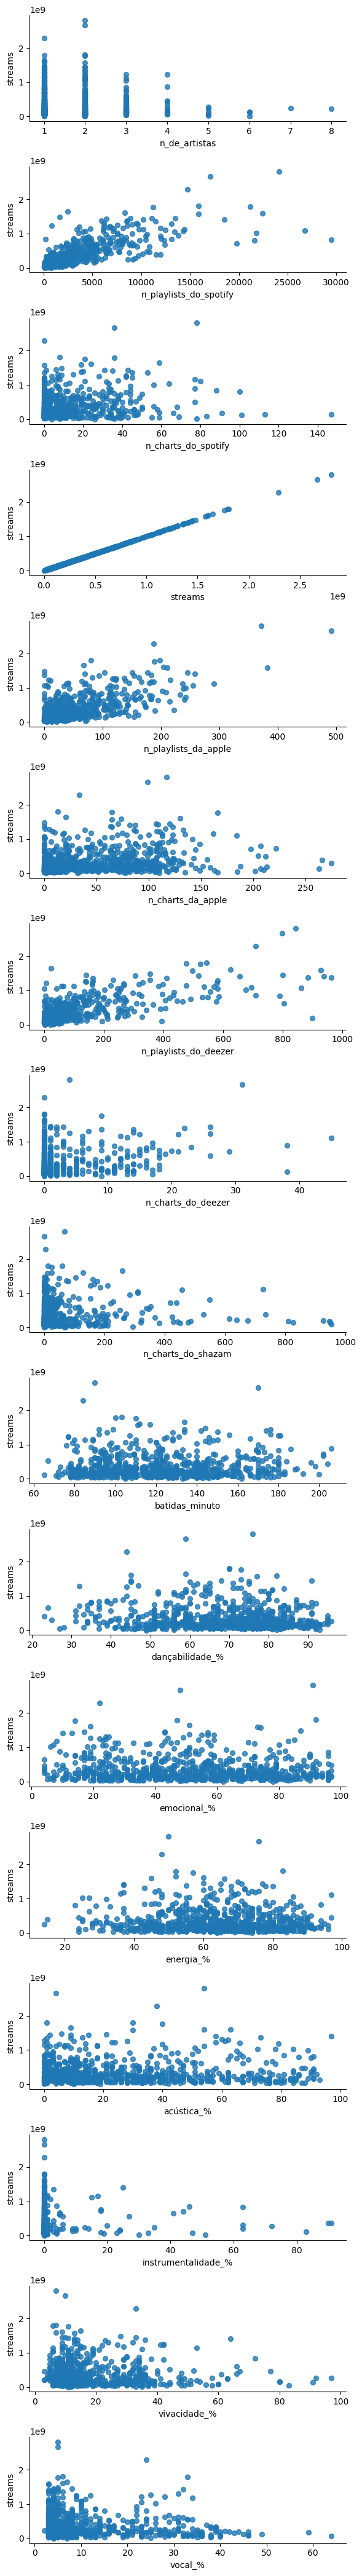

In [12]:
fig, axs = plt.subplots(17, 1, figsize=(6, 42))  # Cria 7 subplots

col = ['nome_da_faixa', 'nome_do(s)_artista(s)', 'ano_de_lançamento', 'mês_de_lançamento', 'dia_de_lançamento', 'chave', 'modo']
counter = 0

for i in df.columns:
  if i not in col:
    df.plot(kind='scatter', x=i, y='streams', s=32, alpha=.8, ax=axs[counter])
    axs[counter].spines[['top', 'right']].set_visible(False)
    counter += 1

plt.tight_layout()
plt.show()

A seguir se encontram as correlações de Pearson para os dados. É possível notar que, quando observadas as correlações entre *streams* e as demais variáveis, as medidas musicais apresentadas não importam tanto, como já visto nos gráficos acima e nas descritivas quando foram comparadas as melhores e piores 50 músicas no *ranking* de *streams*.

Como já imaginado, as correlações envolvendo a coluna *streams* são somente interessantes quando calculadas com as variáveis que indicam a presença das músicas em playlists nos diversos aplicativos.

In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,n_de_artistas,n_playlists_do_spotify,n_charts_do_spotify,streams,n_playlists_da_apple,n_charts_da_apple,n_playlists_do_deezer,n_charts_do_deezer,n_charts_do_shazam,batidas_minuto,dançabilidade_%,emocional_%,energia_%,acústica_%,instrumentalidade_%,vivacidade_%,vocal_%
n_de_artistas,1.000000,-0.062198,-0.007252,-0.092410,-0.004405,-0.077996,-0.067636,0.016568,-0.046388,-0.066057,0.205269,0.116733,0.137345,-0.091950,-0.059186,0.027180,0.131189
n_playlists_do_spotify,-0.062198,1.000000,0.154775,0.759829,0.707300,0.199831,0.788452,0.206760,0.086992,0.015421,-0.109064,-0.075462,-0.074269,0.031512,0.010580,-0.023879,-0.069639
n_charts_do_spotify,-0.007252,0.154775,1.000000,0.231227,0.224327,0.577188,0.120542,0.568738,0.608695,0.024071,0.077321,0.053798,0.112366,-0.075454,-0.012771,-0.024219,-0.099011
streams,-0.092410,0.759829,0.231227,1.000000,0.668079,0.241121,0.713119,0.272716,0.034057,0.018867,-0.079762,-0.077980,-0.063134,0.016240,0.006287,-0.035099,-0.085712
n_playlists_da_apple,-0.004405,0.707300,0.224327,0.668079,1.000000,0.322759,0.668167,0.415174,0.185719,0.035254,0.001188,0.032419,0.052633,-0.072529,-0.053721,-0.055109,-0.097666
n_charts_da_apple,-0.077996,0.199831,0.577188,0.241121,0.322759,1.000000,0.194366,0.367513,0.459567,0.043382,-0.023407,0.047259,0.150306,-0.105149,-0.006609,0.000354,-0.157596
n_playlists_do_deezer,-0.067636,0.788452,0.120542,0.713119,0.668167,0.194366,1.000000,0.225607,0.105420,0.033155,-0.106984,-0.051717,-0.040265,0.041921,0.028702,0.014455,-0.109405
n_charts_do_deezer,0.016568,0.206760,0.568738,0.272716,0.415174,0.367513,0.225607,1.000000,0.388059,0.021743,0.085140,0.063744,0.111369,-0.036239,-0.018267,0.004842,-0.078800
n_charts_do_shazam,-0.046388,0.086992,0.608695,0.034057,0.185719,0.459567,0.105420,0.388059,1.000000,0.087029,-0.016691,-0.019833,0.087619,-0.064157,-0.010863,-0.041931,-0.091301
batidas_minuto,-0.066057,0.015421,0.024071,0.018867,0.035254,0.043382,0.033155,0.021743,0.087029,1.000000,-0.140303,0.046311,0.001107,-0.001422,-0.002464,-0.008703,0.035256


Comparando agora as variáveis categóricas para verificar se existe associação entre elas e o número de *streams*.

O boxplot da variável *streams* em relação à variável *modo* não indica uma diferença, o que é confirmado pelo teste estatístico de Mann-Whitney U ($p.valor = 0.148 > 0.05$, ou seja, não rejeita a hipótese de que as medianas dos grupos sejam iguais), que compara as medianas de dois grupos independentes sem a pressuposição da normalidade dos dados.

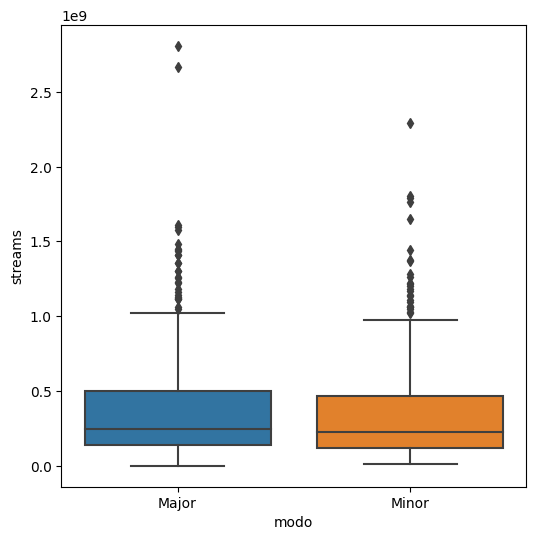

MannwhitneyuResult(statistic=65171.5, pvalue=0.1484548088652865)

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.boxplot(x='modo', y='streams', data=df, ax=ax)
plt.show()

grupo1 = df[df['modo'] == 'Minor']['streams']
grupo2 = df[df['modo'] == 'Major']['streams']

# Executando o teste de Mann-Whitney U
mannwhitneyu(grupo1, grupo2)

Se ao invés de *modo*, comparar com a variável *chave*, não é retornado um resultado diferente do que foi visto. Agora utilizando o teste estatístico de Kruskal-Wallis para comparação de medianas de mais de dois grupos, a hipótese nula de que as medianas são todas iguais também não é rejeitada, devido ao $p.valor = 0.973 > 0.05$.

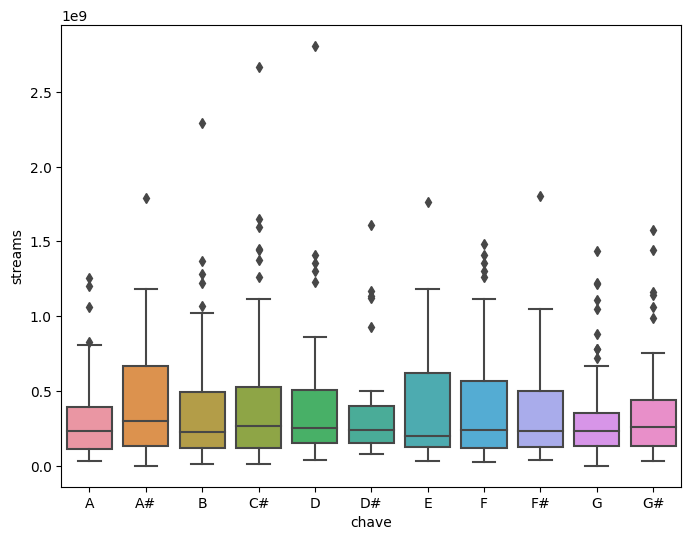

KruskalResult(statistic=3.2993230347489106, pvalue=0.9734770964351901)

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='chave', y='streams', data=df, ax=ax)
plt.show()

grupo1 = df[df['chave'] == 'A']['streams']
grupo2 = df[df['chave'] == 'A#']['streams']
grupo3 = df[df['chave'] == 'B']['streams']
grupo4 = df[df['chave'] == 'C#']['streams']
grupo5 = df[df['chave'] == 'D']['streams']
grupo6 = df[df['chave'] == 'D#']['streams']
grupo7 = df[df['chave'] == 'E']['streams']
grupo8 = df[df['chave'] == 'F']['streams']
grupo9 = df[df['chave'] == 'F#']['streams']
grupo10 = df[df['chave'] == 'G']['streams']
grupo11 = df[df['chave'] == 'G#']['streams']

stats.kruskal(grupo1, grupo2, grupo3, grupo4, grupo5, grupo6, grupo7, grupo8, grupo9, grupo10, grupo11)

Através do andamento do projeto, foi visto a pouca relação do que seria a variável resposta com as características das músicas, o que era o maior interesse. Porém, ainda assim a análise descritiva aqui teve grande papel no processo de entender as relações presentes no banco de dados e mostra que em algumas ocasiões não é necessário criar modelos complexos para se resolver um problema ou entender mais sobre ele, o que foi o caso aqui.